# Práctica reducción de dimensiones

## Importar

In [1]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import chardet

with open('/home/ef/Documents/Diplomado/data/bank-full - bank-full.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
   
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('/home/ef/Documents/Diplomado/data/bank-full(1).csv',
                 sep = ';',
                engine = 'python')

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21635,35,technician,married,secondary,no,141,yes,no,cellular,19,aug,299,2,-1,0,unknown,no
38291,31,admin.,divorced,secondary,no,360,no,no,cellular,15,may,332,1,297,2,other,no
10763,44,management,married,tertiary,no,3091,yes,no,unknown,17,jun,331,4,-1,0,unknown,no
44750,28,management,married,tertiary,no,12,yes,no,cellular,9,sep,202,1,-1,0,unknown,yes
18047,36,management,married,tertiary,no,96,no,no,cellular,30,jul,729,4,-1,0,unknown,yes
691,36,blue-collar,married,primary,no,23,yes,no,unknown,6,may,400,2,-1,0,unknown,no
40649,25,self-employed,single,tertiary,no,557,no,no,telephone,5,aug,813,2,-1,0,unknown,no
1717,28,admin.,single,secondary,no,2831,yes,no,unknown,9,may,211,3,-1,0,unknown,no
779,42,admin.,married,secondary,no,445,yes,no,unknown,7,may,202,2,-1,0,unknown,no
34490,48,blue-collar,single,secondary,no,0,yes,no,cellular,5,may,95,1,-1,0,unknown,no


In [4]:
## No hay vacíos! (al parecer)
df.isnull().sum() / df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [5]:
dim_antes = df.shape[0]
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
cat = ['job','marital','education','default','housing', 'loan', 'contact', 'month', 'poutcome']
num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Limpieza

### Numéricas

In [8]:
## Función para omitir outliers mediante IQR
def outlier(data, x, how):

    var = data[x]
    q1 = var.quantile(.25)
    q3 = var.quantile(.75)
    iqr = q3 - q1
    
    if how == 'max':
        data = data[var <= q3 + 1.5*iqr].copy()
        var = data[x]
        print(var.hist())
    elif how == 'min':
        data = data[var >= q1 - 1.5*iqr].copy()
        var = data[x]
        print(var.hist())
    elif how == 'both':
        data = data[(var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr)].copy()
        var = data[x]
        print(var.hist())
    else:
        print('¿Cómo quieres acotar outliers? how = min/max/both')
    
    data.reset_index(drop = True, inplace = True)
    global df
    df = data.copy()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

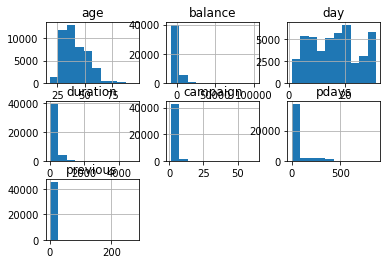

In [9]:
df[num].hist()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


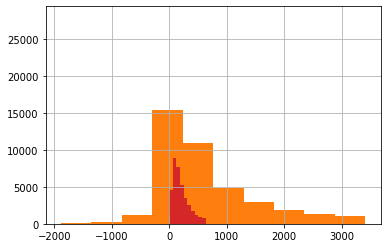

In [10]:
for col in num:
    outlier(df,col, how = 'both')

In [11]:
## No parece que estas columnas aporten al conjunto de datos
df[['pdays', 'previous']].value_counts()

pdays  previous
-1     0           28069
dtype: int64

In [12]:
## Se omiten dentro del conjunto de variables continuas
num = [x for x in num if x not in ['pdays', 'previous']]
num

['age', 'balance', 'day', 'duration', 'campaign']

### Categóricas

In [13]:
## La variable de trabajo tiene bajo % desconocido, cuenta como valor ausente
df['job'].value_counts(1)

blue-collar      0.225729
management       0.198582
technician       0.170295
admin.           0.115857
services         0.097510
retired          0.040472
entrepreneur     0.034273
self-employed    0.033916
unemployed       0.029142
housemaid        0.029107
student          0.018918
unknown          0.006199
Name: job, dtype: float64

In [14]:
## Se omite, no hay riesgo de mucha pérdida de info
df['job'] = df['job'].replace('unknown', np.nan )
df = df[~(df['job'].isnull())].copy()
df.reset_index(drop = True, inplace = True)
df['job'].value_counts(1, dropna = False)

blue-collar      0.227137
management       0.199821
technician       0.171357
admin.           0.116580
services         0.098118
retired          0.040724
entrepreneur     0.034486
self-employed    0.034128
unemployed       0.029324
housemaid        0.029288
student          0.019036
Name: job, dtype: float64

In [15]:
## Mismo caso para la variable de educación
df['education'].value_counts(1, dropna = False)

secondary    0.529952
tertiary     0.277362
primary      0.155870
unknown      0.036817
Name: education, dtype: float64

In [16]:
df['education'] = df['education'].replace('unknown', np.nan )
df = df[~(df['education'].isnull())].copy()
df.reset_index(drop = True, inplace = True)
df['education'].value_counts(1, dropna = False)

secondary    0.550208
tertiary     0.287963
primary      0.161828
Name: education, dtype: float64

In [17]:
## Por otro lado, no es recomendable remover el valor "unknown",
## la falta de información también es información
df['contact'].value_counts(1, dropna = False)

cellular     0.589177
unknown      0.358828
telephone    0.051995
Name: contact, dtype: float64

In [18]:
## Otra variable que no aporta a nuestro conjunto de datos
df['poutcome'].value_counts(1, dropna = False)

unknown    1.0
Name: poutcome, dtype: float64

In [19]:
## Se omite de nuestro conjunto de variables categóricas
cat = [x for x in cat if x not in 'poutcome']
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [20]:
## Después de la limpieza, contamos con casi el 60% de los datos :/
df.shape[0] / dim_antes

0.594280153060096

## WOE

In [21]:
## Se crea una variable dicotómica para usar como objetivo
df['OBJETIVO'] = (df['campaign'] == 1 )*1
df['OBJETIVO'].value_counts(1)

0    0.604771
1    0.395229
Name: OBJETIVO, dtype: float64

<AxesSubplot:>

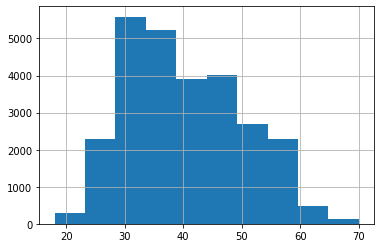

In [22]:
df['age'].hist()

In [23]:
pd.qcut(df['age'], q = 4).value_counts(1).reset_index().sort_values(by = 'index')

,index,age
1,"(17.999, 32.0]",0.259119
0,"(32.0, 39.0]",0.272369
2,"(39.0, 48.0]",0.237829
3,"(48.0, 70.0]",0.230683


In [24]:
len(pd.qcut(df['age'], q = 4, retbins = True))

2

In [25]:
pd.qcut(df['age'], q = 4, retbins = True)[1]

array([18., 32., 39., 48., 70.])

In [26]:
## Guardar variables continuas y categóricas en listas
num = ['age', 'balance', 'duration']
cat = ['job','marital','education']

## Se separa el conjunto de entrenamiento y prueba
X = df[cat + num]
y = df['OBJETIVO']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Se discretizan las variables numéricas en train, se vuelven rangos (por percentil)
for col in num:
    X_train[f'{col}_cut'] , bines = pd.qcut(X_train[f'{col}'],
                                           q = 4, # el 4 significa que cada corte tendrá el 25% de los registros
                                           retbins = True, ## se guardan los cortes para aplicar a test
                                           duplicates = 'drop')
    
    X_train[f'{col}_cut'] = X_train[f'{col}_cut'].astype(str)
    
    ## Se aplican los bines de train a test
    X_test[f'{col}_cut'] = pd.cut(X_test[f'{col}'],
                                  bins = bines).astype(str)

## Se reemplazan los missings
X_train = X_train.replace(np.nan, "Missings")
X_test = X_test.replace({np.nan:"Missings",'nan':"Missings"})

<ipython-input-26-124a16b076d2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[f'{col}_cut'] , bines = pd.qcut(X_train[f'{col}'],
<ipython-input-26-124a16b076d2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[f'{col}_cut'] = X_train[f'{col}_cut'].astype(str)
<ipython-input-26-124a16b076d2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [27]:
## COMENTARIO
display(X_train['age_cut'].value_counts(1).reset_index().sort_values(by = 'index'))
X_test['age_cut'].value_counts(1).reset_index().sort_values(by = 'index')

,index,age_cut
1,"(17.999, 32.0]",0.260754
2,"(32.0, 38.0]",0.240230
0,"(38.0, 48.0]",0.268570
3,"(48.0, 70.0]",0.230446


,index,age_cut
1,"(18.0, 32.0]",0.255179
2,"(32.0, 38.0]",0.236943
0,"(38.0, 48.0]",0.276517
3,"(48.0, 70.0]",0.231237
4,Missings,0.000124


In [28]:
## COMENTARIO
X_test[X_test['age_cut'] == 'Missings']

,job,marital,education,age,balance,duration,age_cut,balance_cut,duration_cut
25710,student,single,primary,18,608,267,Missings,"(309.0, 901.0]","(168.0, 275.0]"


In [29]:
def woe(obj, df, var):
    obj = obj #se instancia dentro de la función para que el siguiente bucle la tome en cuenta
    woe_dict = {} #se crea un diccionario vacío
    iv_fin = {}
    for x in var:
        aux = df[[x, obj]].copy() #nos interesa evaluar cada variable vs nuestra variable objetivo
        aux['n'] = 1 #columna de apoyo para hacer la suma

        ## Se transforma la estructura de la tabla:
        aux = aux.pivot_table(columns = obj, #teniendo las opciones de nuestra variable objetivo como columnas
                              index = x, #y las categorías (rangos para las numéricas) como renglones
                              values = 'n', #el contador por categoría vs resultado de la variable objetivo
                              aggfunc = 'sum',
                              fill_value = 0).copy() #llenar los vacíos con ceros

        aux['no_ev'] = aux[0] / aux[0].sum() #divide cada renglón entre el total para obtener la proba de no evento
        aux['si_ev'] = aux[1] / aux[1].sum() #proba de sí evento
        
        aux['woe'] = np.log(aux['no_ev'] / aux['si_ev']) #se crea la columna de WOE (Weight Of Evidence)
        
        ## Se obtiene IV
        aux['iv'] = aux['woe']*(aux['no_ev'] - aux['si_ev']) #se crea la columna individual de IV (Info Value)
        iv_fin[x] = aux['iv'].sum() #y finalmente, suma la columna y la agrega al diccionario
        
        ## Nos quedamos con la columna woe y le cambiamos el nombre según la variable
        aux = aux['woe'].reset_index().rename(columns={'woe': f'W_{x}'})

        ## Actualizamos diccionario woe
        woe_dict[x] = dict(zip(aux.iloc[:,0],aux.iloc[:,1]))
        
        ## crearemos nuevas columnas "woe-izadas"
        df = df.merge(aux, on = x, how = 'left')
    
    return df, woe_dict, iv_fin

In [30]:
## Unimos X con y tanto en train como en test
train = X_train.join(pd.DataFrame(y_train, columns = ['OBJETIVO']))
test = X_test.join(pd.DataFrame(y_test, columns = ['OBJETIVO']))

def examen(train, test, var):
    train, dic_woe, iv = woe('OBJETIVO', train, var)
    test = woe('OBJETIVO', test, var)[0]
    return train, test, dic_woe, iv

## Se agrupan las variables a evaluar: categóricas y numéricas discretizadas (cut)
variables = cat + [col for col in X_train.columns if col.endswith('_cut')]

## Se aplica la función
X_train_woe, X_test_woe, woe_dic, iv = examen(train, test, variables)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
display(X_train_woe.sample(3))
display(X_test_woe.sample(3))
display(iv)
woe_dic

,job,marital,education,age,balance,duration,age_cut,balance_cut,duration_cut,OBJETIVO,W_job,W_marital,W_education,W_age_cut,W_balance_cut,W_duration_cut
12876,blue-collar,married,secondary,40,617,257,"(38.0, 48.0]","(309.0, 901.0]","(168.0, 275.0]",1,0.033908,0.083053,-0.034937,0.035259,0.004940,-0.061140
14099,management,single,secondary,27,116,138,"(17.999, 32.0]","(29.0, 309.0]","(101.0, 168.0]",0,0.119955,-0.145524,-0.034937,-0.136163,-0.000218,0.039265
3514,management,married,secondary,35,97,135,"(32.0, 38.0]","(29.0, 309.0]","(101.0, 168.0]",0,0.119955,0.083053,-0.034937,0.000889,-0.000218,0.039265


,job,marital,education,age,balance,duration,age_cut,balance_cut,duration_cut,OBJETIVO,W_job,W_marital,W_education,W_age_cut,W_balance_cut,W_duration_cut
209,blue-collar,single,secondary,25,249,149,"(18.0, 32.0]","(29.0, 309.0]","(101.0, 168.0]",0,-0.043317,-0.178874,-0.034405,-0.118138,0.001216,0.073160
1059,self-employed,married,secondary,31,0,36,"(18.0, 32.0]","(-1854.0, 29.0]","(0.0, 101.0]",0,0.028186,0.097715,-0.034405,-0.118138,0.036184,0.049784
5507,self-employed,married,tertiary,49,99,83,"(48.0, 70.0]","(29.0, 309.0]","(0.0, 101.0]",1,0.028186,0.097715,0.061863,0.018124,0.001216,0.049784


{'job': 0.02288695835257753,
 'marital': 0.010606379957071716,
 'education': 0.0015413946556486167,
 'age_cut': 0.008266185956095105,
 'balance_cut': 0.000563973183809606,
 'duration_cut': 0.004706933165070633}

{'job': {'admin.': -0.22647827660614162,
  'blue-collar': 0.033907917032108464,
  'entrepreneur': -0.13748530329327016,
  'housemaid': 0.12787386439091966,
  'management': 0.11995469707833584,
  'retired': -0.12489045465095437,
  'self-employed': 0.04902201009178894,
  'services': -0.15039904129330223,
  'student': -0.3386052848094835,
  'technician': 0.17376611925259614,
  'unemployed': -0.28535775893795995},
 'marital': {'divorced': -0.06329856365739954,
  'married': 0.08305265141022078,
  'single': -0.14552363161068885},
 'education': {'primary': 0.031113152523526928,
  'secondary': -0.0349367265565438,
  'tertiary': 0.04978581827199334},
 'age_cut': {'(17.999, 32.0]': -0.1361625850872005,
  '(32.0, 38.0]': 0.0008890509847918049,
  '(38.0, 48.0]': 0.035259399496319795,
  '(48.0, 70.0]': 0.11556999602529434},
 'balance_cut': {'(-1854.001, 29.0]': 0.03099368042526952,
  '(29.0, 309.0]': -0.00021807745083460677,
  '(309.0, 901.0]': 0.0049396702091410605,
  '(901.0, 3412.0]': -0.0356037